# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

#### 1.1 Import das bibliotecas

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

#### Carregando os dados

In [20]:
df = pd.read_csv('./data/demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [22]:
#VALORES MISSING OCCUPATION_TYPE 134203
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [23]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [24]:
#FIZ UMA COPIA DO DATAFRAME PARA CONVERTER EM DUMMYS
df_convert_dummy = df.copy()
df_convert_dummy

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [50]:
#CONVERTE EM DUMMYS
df_convert_dummy.value_counts(['mau'])


mau  
False    16260
True       390
Name: count, dtype: int64

In [26]:
df_encoded = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  object 
 1   posse_de_veiculo                        16650 non-null  object 
 2   posse_de_imovel                         16650 non-null  object 
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [28]:
df_encoded

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,M,Y,Y,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
3,M,Y,Y,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,F,Y,N,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,54.109589,9.884932,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
16646,F,N,Y,0,43.389041,7.380822,1,1,1,0,...,True,True,False,False,False,True,False,False,False,False
16647,M,Y,Y,0,30.005479,9.800000,1,1,0,0,...,True,True,False,False,False,True,False,False,False,False
16648,M,Y,Y,0,30.005479,9.800000,1,1,0,0,...,True,True,False,False,False,True,False,False,False,False


In [29]:
#CONVERTER EM 0 E 1
df_encoded['sexo'].replace(to_replace=['M', 'F'], value=['1', '0'], inplace=True)
df_encoded['posse_de_veiculo'].replace(to_replace=['Y', 'N'], value=['1', '0'], inplace=True)
df_encoded['posse_de_imovel'].replace(to_replace=['Y', 'N'], value=['1', '0'], inplace=True)

C:\Users\Agnelo\AppData\Local\Temp\ipykernel_22284\3111104262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['sexo'].replace(to_replace=['M', 'F'], value=['1', '0'], inplace=True)
C:\Users\Agnelo\AppData\Local\Temp\ipykernel_22284\3111104262.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [30]:
#CONVERTER EM INTEIROS
df_encoded['sexo']=df_encoded['sexo'].astype(int)
df_encoded['posse_de_veiculo']=df_encoded['posse_de_veiculo'].astype(int)
df_encoded['posse_de_imovel']=df_encoded['posse_de_imovel'].astype(int)

# df_encoded.dtypes

In [31]:
df_encoded.dtypes

sexo                                        int32
posse_de_veiculo                            int32
posse_de_imovel                             int32
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


In [32]:
#SEPARANDO O DATAFRAME 70%  HEAD TREINO

df_treino = df_encoded.head(int(len(df)* 0.7))
df_treino

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11650,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11651,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11652,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11653,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False


In [33]:
#SEPARANDO 70% TAIL TESTE
df_teste = df_encoded.tail(int(len(df)* 0.3))
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 11655 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    4995 non-null   int32  
 1   posse_de_veiculo                        4995 non-null   int32  
 2   posse_de_imovel                         4995 non-null   int32  
 3   qtd_filhos                              4995 non-null   int64  
 4   idade                                   4995 non-null   float64
 5   tempo_emprego                           4995 non-null   float64
 6   possui_celular                          4995 non-null   int64  
 7   possui_fone_comercial                   4995 non-null   int64  
 8   possui_fone                             4995 non-null   int64  
 9   possui_email                            4995 non-null   int64  
 10  qt_pessoas_residencia                   4995 non-null  

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [51]:
# 1  Defina um objeto com a função da árvore de decisão vista em aula.

y = df_treino.mau

In [52]:
X = df_treino.drop('mau', axis=1)

In [53]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [56]:
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11650,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11651,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11652,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11653,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False


In [57]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
11650     True
11651     True
11652     True
11653     True
11654    False
Name: mau, Length: 11655, dtype: bool

In [58]:
#Verificar se tem referencia a sexo


X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11650,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11651,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11652,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11653,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False


In [59]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

In [61]:
df_treino.mau.value_counts()

mau
False    11529
True       126
Name: count, dtype: int64

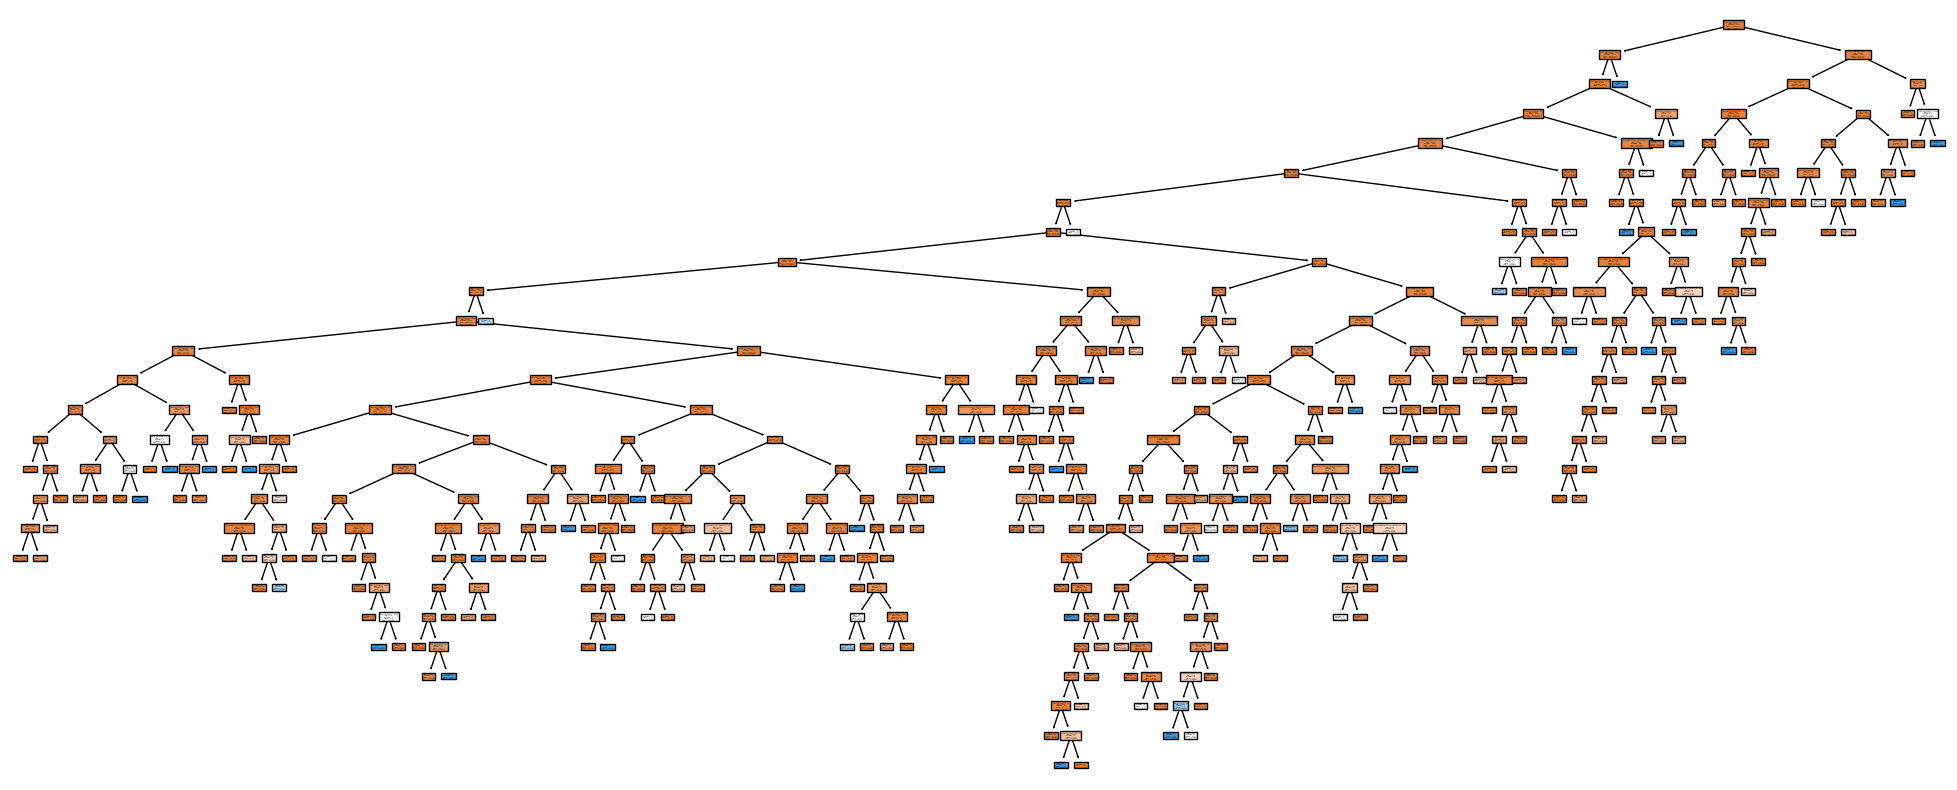

In [68]:
plt.figure(figsize=(25, 10))
plot_tree(clf, 
            filled=True,
            class_names=['Aprovado', 'Reprovado'],
            feature_names=X.columns);

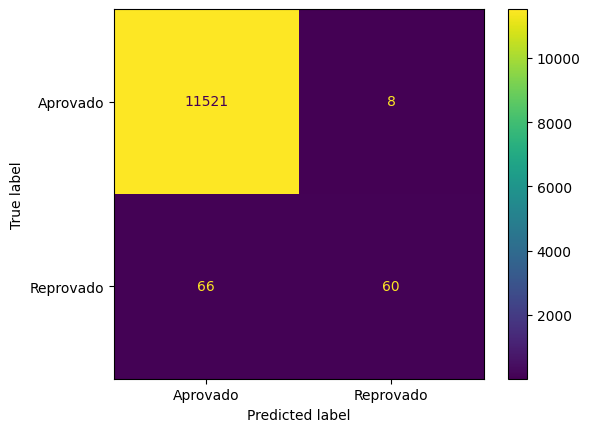

In [69]:
ConfusionMatrixDisplay.from_estimator(clf, X,y, display_labels=['Aprovado', 'Reprovado']);
plt.show()

In [70]:
predict = clf.predict(X)

In [73]:
accuracy_score(y, predict)

0.9936507936507937

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [92]:
y = df_teste.mau

In [93]:
X = df_teste.drop('mau', axis=1)

In [94]:
y

11655     True
11656    False
11657    False
11658    False
11659    False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 4995, dtype: bool

In [95]:
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
11655,1,0,1,0,28.764384,1.493151,1,0,0,1,...,False,False,False,True,False,True,False,False,False,False
11656,1,1,1,2,47.479452,2.323288,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
11657,1,1,1,2,47.479452,2.323288,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
11658,0,0,0,0,43.882192,3.830137,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
11659,0,0,0,0,43.882192,3.830137,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,0,1,0,54.109589,9.884932,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
16646,0,0,1,0,43.389041,7.380822,1,1,1,0,...,True,True,False,False,False,True,False,False,False,False
16647,1,1,1,0,30.005479,9.800000,1,1,0,0,...,True,True,False,False,False,True,False,False,False,False
16648,1,1,1,0,30.005479,9.800000,1,1,0,0,...,True,True,False,False,False,True,False,False,False,False


In [96]:
clf = DecisionTreeClassifier(random_state=123)
clf

DecisionTreeClassifier(random_state=123)

In [97]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=123)

In [98]:
df_teste.mau.value_counts()

mau
False    4731
True      264
Name: count, dtype: int64

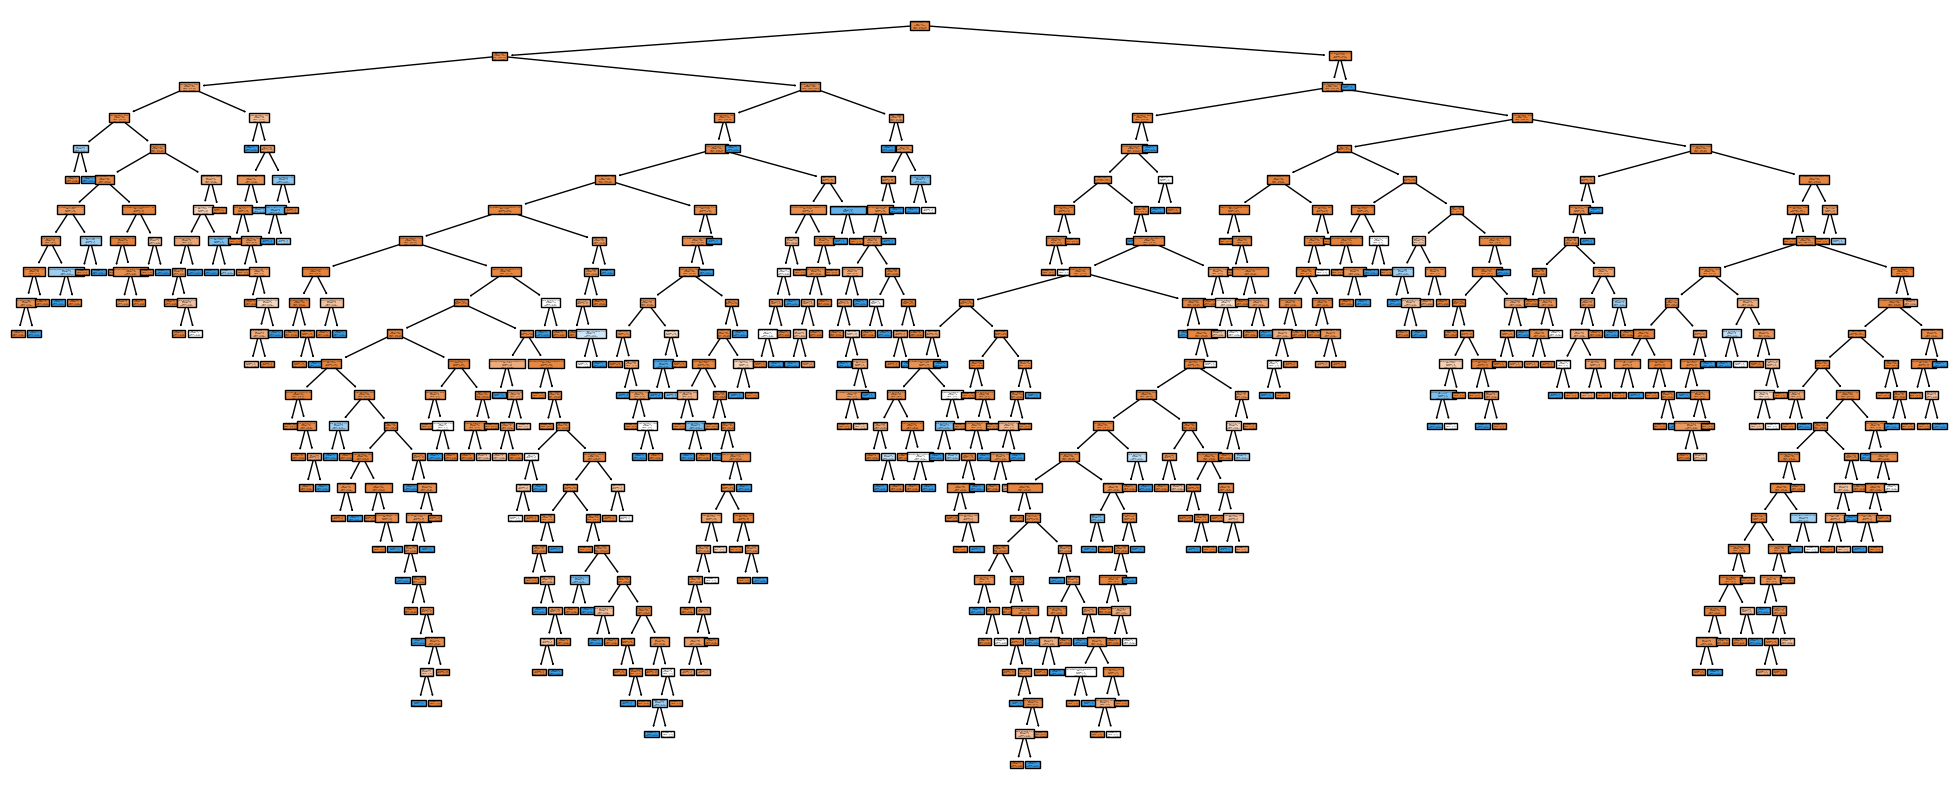

In [99]:
plt.figure(figsize=(25, 10))
plot_tree(clf, 
            filled=True,
            class_names=['Aprovado', 'Reprovado'],
            feature_names=X.columns);

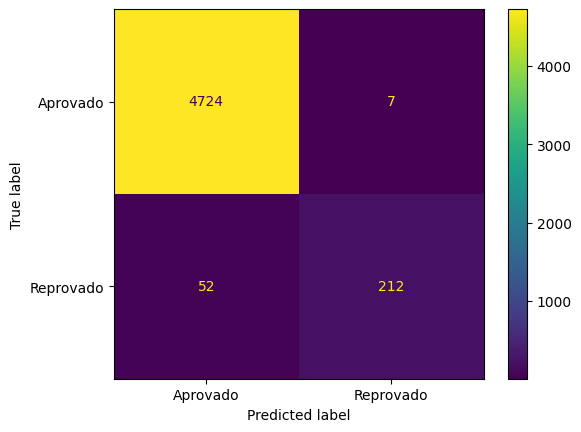

In [100]:
ConfusionMatrixDisplay.from_estimator(clf, X,y, display_labels=['Aprovado', 'Reprovado']);
plt.show()

In [101]:
predict = clf.predict(X)

In [102]:
accuracy_score(y, predict)

0.9881881881881882